# Plots of Beijing Data

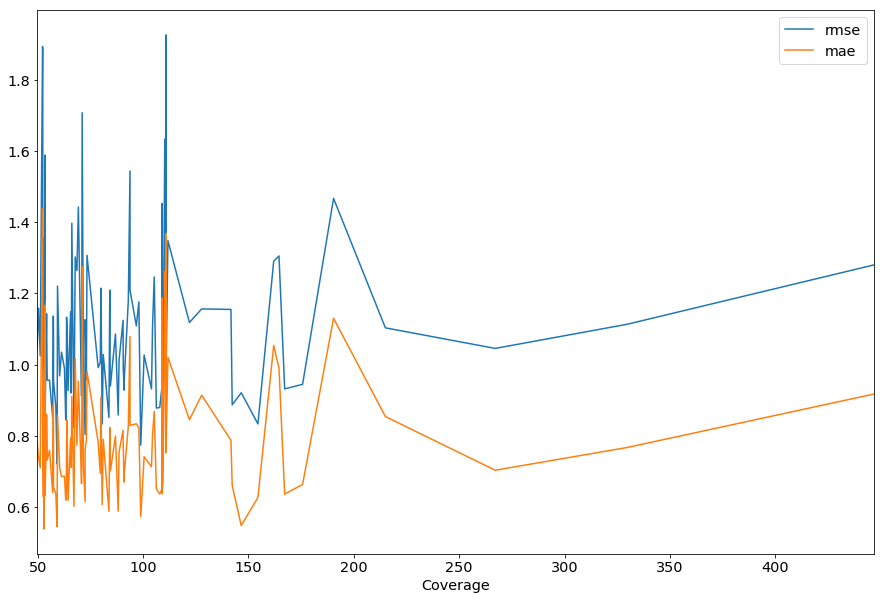

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)




results_df = pd.read_csv('/Users/ritavityaz/Downloads/data/beijing_rmse_mae.txt')
coverage_df = pd.read_csv('/Users/ritavityaz/Downloads/Copy_numbers.csv')
new_df =  pd.merge(results_df, coverage_df, on ='genome', how = 'inner')
final_df =  new_df.sort_values('Mean Coverage')
final_df
# plt.rcParams['figure.figsize'] = [20, 15]

plot = final_df.plot(x='Mean Coverage')
plt.xlabel('Coverage')
plt.savefig('/Users/ritavityaz/coverage-beijing-mrse.png')



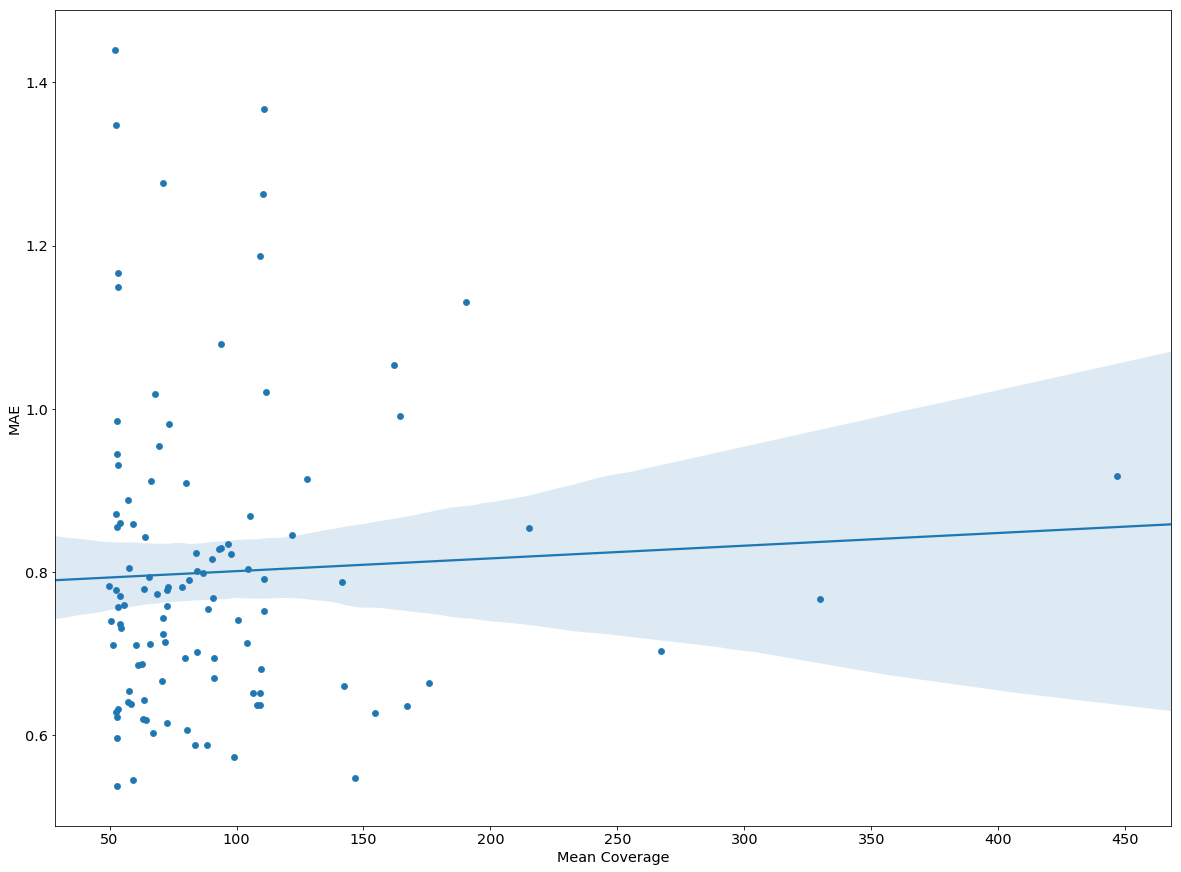

In [69]:
final_df.plot.scatter(x='Mean Coverage', y='mae');



import seaborn as sns

sns.regplot(final_df['Mean Coverage'],final_df['mae'])

plt.ylabel('MAE')
plt.savefig('/Users/ritavityaz/coverage-beijing-mae-scatter.png')


In [81]:
import statsmodels.formula.api as sm
final_df.rename(columns={"Mean Coverage":'Coverage'}, inplace=True)
result_cov = sm.ols(formula="mae ~ Coverage", data=final_df).fit()
print(result_cov.summary())

                            OLS Regression Results                            
Dep. Variable:                    mae   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2426
Date:                Wed, 09 May 2018   Prob (F-statistic):              0.623
Time:                        13:54:02   Log-Likelihood:                 30.337
No. Observations:                 108   AIC:                            -56.67
Df Residuals:                     106   BIC:                            -51.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7854      0.034     23.124      0.0

In [44]:
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

real_beijing_df = pd.read_csv('/Users/ritavityaz/Downloads/Beijing_templates.txt')

expHunter_beijing_df = pd.read_csv("/Users/ritavityaz/PycharmProjects/PythonPRINCE/results/beijing_expHunter.csv")
# real_beijing_df


# real_kelowna_df
beijing_real =  real_beijing_df.set_index('Template').T
beijing_real.drop(beijing_real.tail(1).index,inplace=True)
beijing_real.reset_index(inplace=True)

beijing_real

beijing_real.rename(columns={'index':'templates'}, inplace=True)
beijing =  pd.merge(beijing_real, expHunter_beijing_df, on ='templates', how = 'inner')

beijing.drop('Unnamed: 0', axis=1, inplace=True)

beijing

,templates,MAE,RMSE,mae_expHunter,mrse_expHunter
0,154,0.218704,0.283131,4.587379,5.963685
1,580,0.351944,0.498944,0.928571,1.133893
2,960,1.601111,1.718935,0.900000,1.508310
3,2059,0.263519,0.347675,1.582524,2.390312
4,2531,0.874907,1.158372,0.932039,1.356394
5,2687,1.064815,1.106662,4.757282,4.888564
6,2996,1.180463,1.460489,2.655340,3.137233
7,3007,0.448333,0.587194,2.296117,3.618654
8,3192,0.634352,0.762719,1.296117,1.495138
9,4348,0.382315,0.489956,1.567961,3.043774


In [46]:

beijing.drop('RMSE', axis=1, inplace=True)
beijing.drop('mrse_expHunter', axis=1, inplace=True)

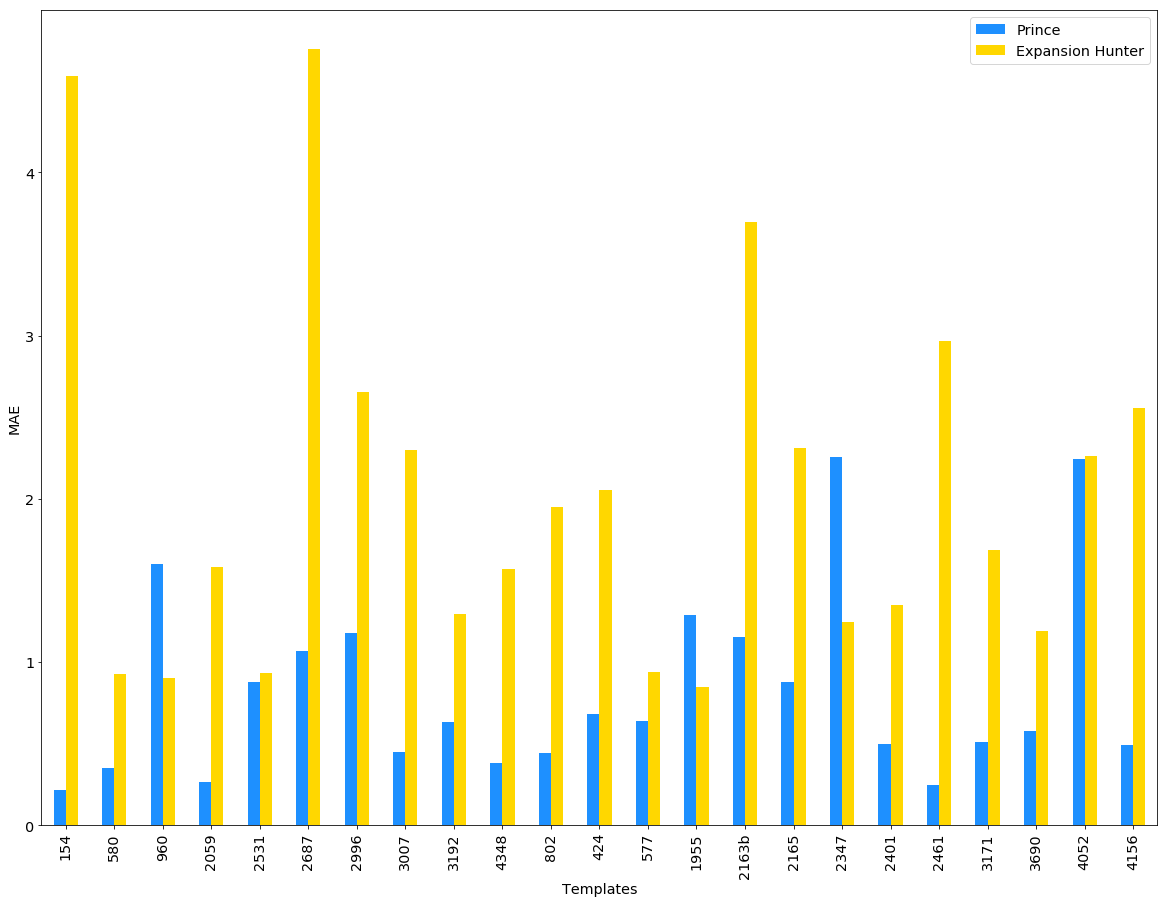

In [47]:
%matplotlib inline

colors = {"MAE": 'dodgerblue',"mae_expHunter": 'gold'}
columns = ['MAE','mae_expHunter']
plt.rcParams['figure.figsize'] = [20, 15]
beijing.plot(color=[colors.get(x) for x in columns],kind="bar", x = "templates").legend(["Prince", "Expansion Hunter"])
plt.xlabel('Templates')
plt.ylabel('MAE')
plt.savefig('/Users/ritavityaz/compare-beijing-mae.png')


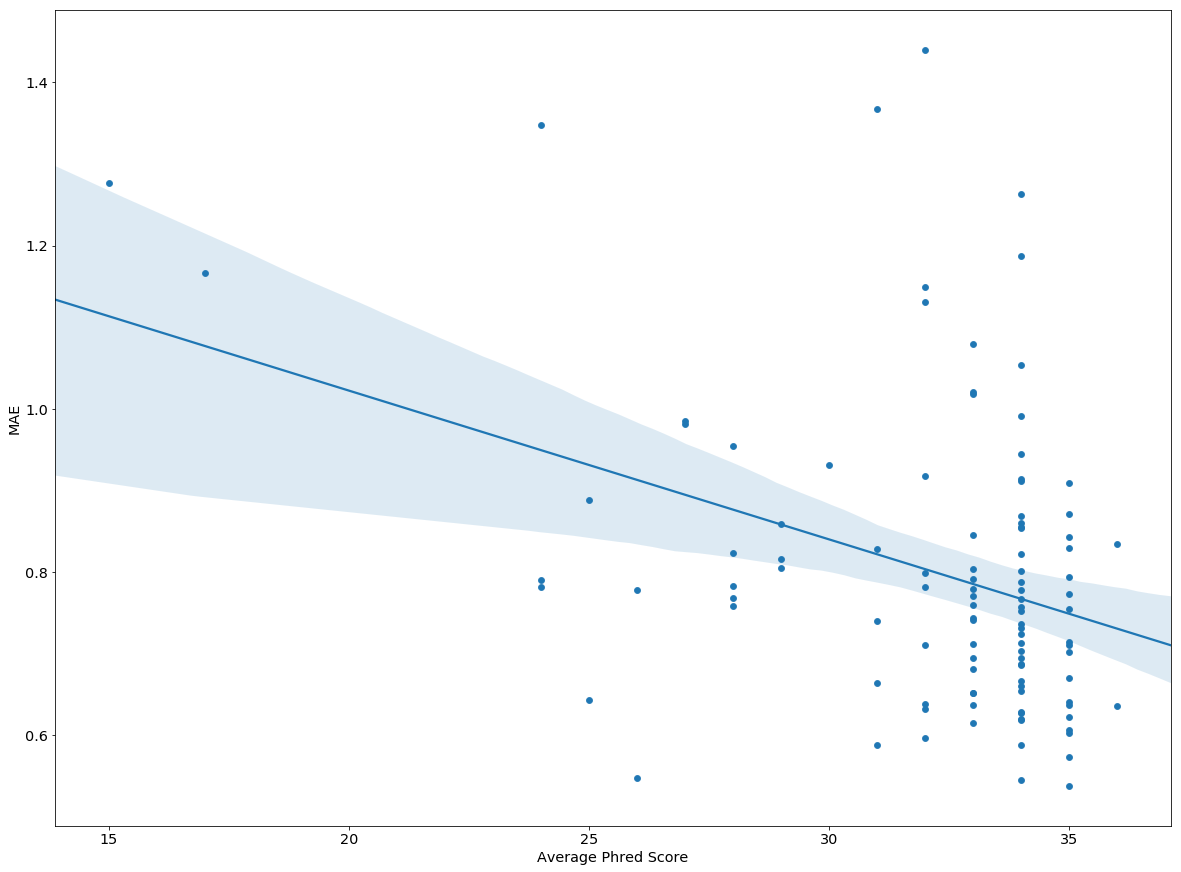

In [67]:
import pandas as pd
quality = pd.read_csv('//Users/ritavityaz/Downloads/beijing_qualities.txt')
results_df = pd.read_csv('/Users/ritavityaz/Downloads/data/beijing_rmse_mae.txt')


beijing_qual =  pd.merge(results_df, quality, on ='genome', how = 'inner')
beijing_qual.drop('rmse', axis=1, inplace=True)

beijing_qual =  beijing_qual.sort_values('Average Phred Score', ascending=False)
beijing_qual

plt.rcParams['figure.figsize'] = [20, 15]

# plot = beijing_qual.plot(x='Average Phred Score')

beijing_qual.plot.scatter(x="Average Phred Score", y='mae');

plt.xlabel('Average Phred Score')
plt.ylabel('MAE')

import seaborn as sns

sns.regplot(beijing_qual["Average Phred Score"],beijing_qual['mae'])


plt.ylabel('MAE')


plt.savefig('/Users/ritavityaz/beijing-phred-scatter.png')

In [80]:
import statsmodels.formula.api as sm
beijing_qual.rename(columns={"Average Phred Score":'Phred'}, inplace=True)
result_qual = sm.ols(formula="mae ~ Phred", data=beijing_qual).fit()
print(result_qual.summary())

                            OLS Regression Results                            
Dep. Variable:                    mae   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     15.55
Date:                Wed, 09 May 2018   Prob (F-statistic):           0.000145
Time:                        13:52:00   Log-Likelihood:                 37.604
No. Observations:                 108   AIC:                            -71.21
Df Residuals:                     106   BIC:                            -65.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3870      0.150      9.254      0.0

# Plots for Kelowna data

In [60]:
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

real_kelowna_df = pd.read_csv('/Users/ritavityaz/Downloads/Kelowna_templates .txt')


expHunter_kelowna_df = pd.read_csv("/Users/ritavityaz/PycharmProjects/PythonPRINCE/results/Kelowna_expHunter.csv")
expHunter_kelowna_df

expHunter_kelowna_df.loc[len(expHunter_kelowna_df)]=[22,0,0,'580'] 
expHunter_kelowna_df

real_kelowna_df
kelowna_real =  real_kelowna_df.set_index('Template').T
kelowna_real.drop(kelowna_real.tail(1).index,inplace=True)
kelowna_real.reset_index(inplace=True)

kelowna_real.rename(columns={'index':'templates'}, inplace=True)


kelowna =  pd.merge(kelowna_real, expHunter_kelowna_df, on ='templates', how = 'inner')

kelowna.drop('Unnamed: 0', axis=1, inplace=True)

kelowna


,templates,MAE,mae_expHunter,mrse_expHunter
0,154,0.243043,0.333333,1.050793
1,580,0.220435,0.000000,0.000000
2,960,1.244348,1.729167,2.551552
3,2059,0.218261,0.916667,1.198958
4,2531,0.943913,0.875000,1.030776
5,2687,0.978696,4.791667,4.836924
6,2996,1.050000,3.208333,3.567796
7,3007,0.433043,0.854167,0.940966
8,3192,0.671739,0.875000,1.136515
9,4348,0.546522,0.729167,1.211920


In [62]:

# kelowna.drop('RMSE', axis=1, inplace=True)
kelowna.drop('mrse_expHunter', axis=1, inplace=True)

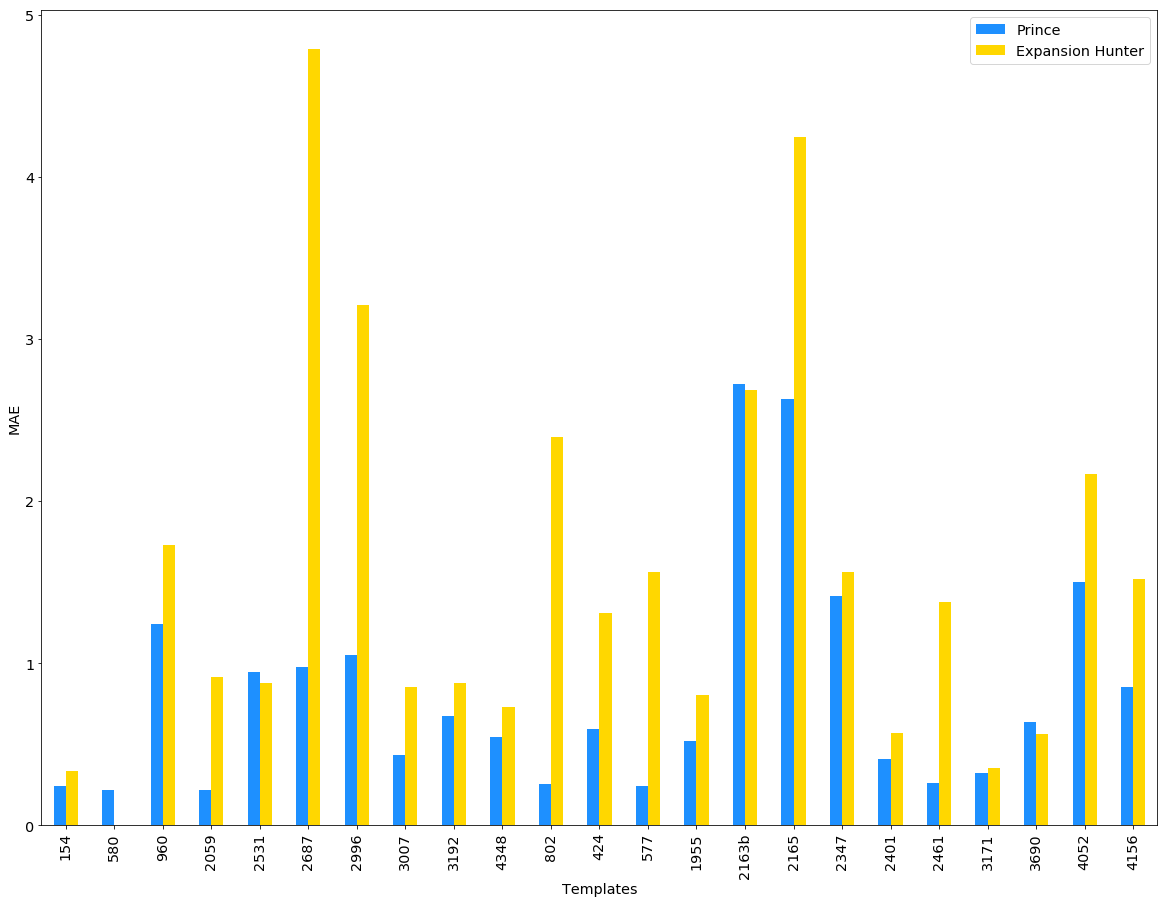

In [63]:
%matplotlib inline


colors = {"MAE": 'dodgerblue',"mae_expHunter": 'gold'}
columns = ['MAE','mae_expHunter']
plt.rcParams['figure.figsize'] = [20, 15]
kelowna.plot(color=[colors.get(x) for x in columns],kind="bar", x = "templates").legend(["Prince", "Expansion Hunter"])
plt.xlabel('Templates')
plt.ylabel('MAE')



plt.savefig('/Users/ritavityaz/compare-kelowna-mae.png')


# Plots for simulated data

In [18]:
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

sim_df = pd.read_csv('/Users/ritavityaz/Downloads/per_template_data/sim_per_template_results.csv')

expHunter_sim_df = pd.read_csv("/Users/ritavityaz/PycharmProjects/PythonPRINCE/results/fake_expHunter.csv")



# real_kelowna_df
sim =  sim_df.set_index('Template').T
sim.drop(sim.tail(1).index,inplace=True)
sim.reset_index(inplace=True)

sim.rename(columns={'index':'templates'}, inplace=True)
# sim

fake =  pd.merge(sim, expHunter_sim_df, on ='templates', how = 'inner')

fake.drop('Unnamed: 0', axis=1, inplace=True)
fake


,templates,MAE,RMSE,mae_expHunter,mrse_expHunter
0,154,0.145556,0.193075,3.111111,3.730505
1,580,0.603889,0.654128,1.000000,1.000000
2,960,0.556667,0.659891,1.000000,1.554563
3,2059,0.286111,0.341476,1.527778,2.044641
4,2531,1.711111,1.752544,0.833333,1.130388
5,2687,0.319444,0.381903,3.222222,3.403430
6,2996,2.183889,2.254988,1.888889,2.166667
7,3007,0.100556,0.121724,3.294118,3.792407
8,3192,0.375556,0.497326,0.888889,1.394433
9,4348,0.349444,0.408092,0.957143,1.805943


In [34]:
fake.drop('RMSE', axis=1, inplace=True)
fake.drop('mrse_expHunter', axis=1, inplace=True)

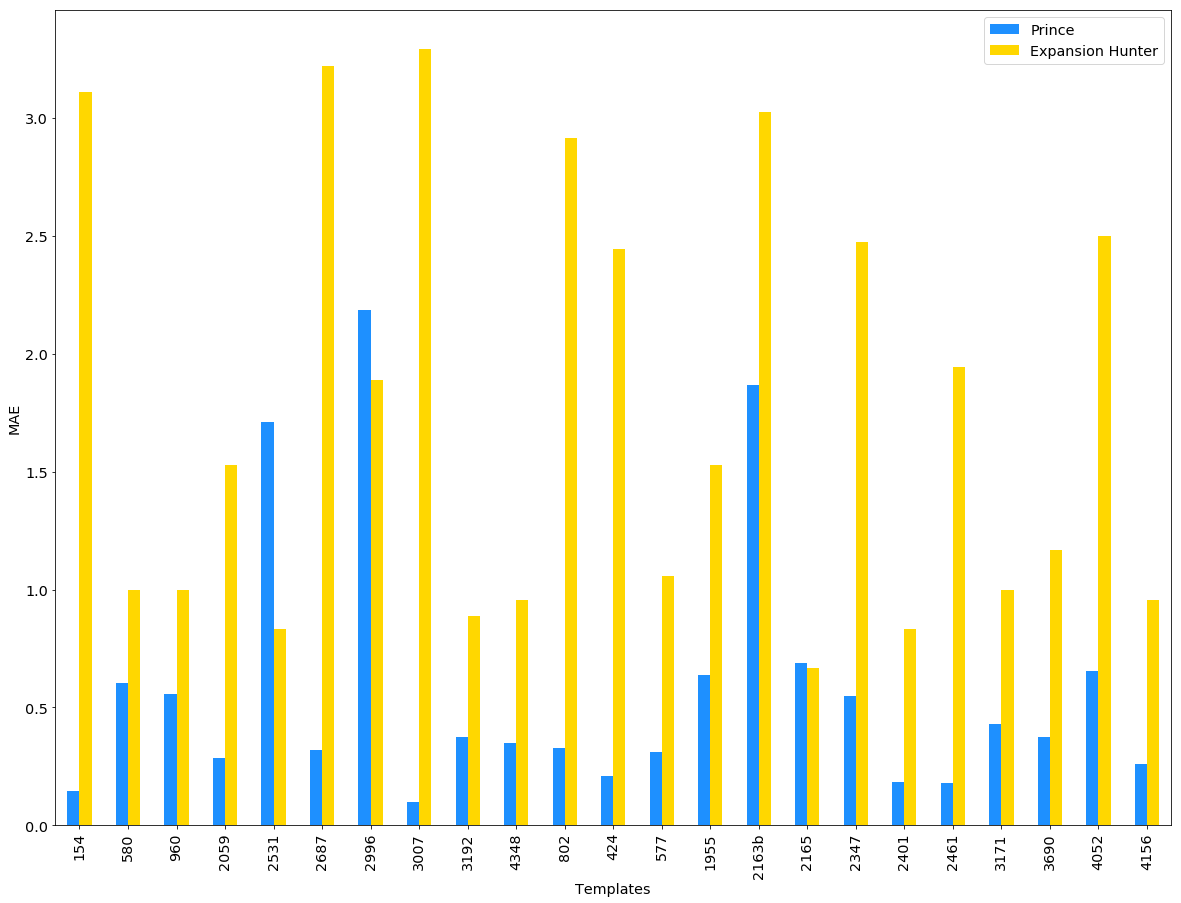

In [42]:
%matplotlib inline


colors = {"MAE": 'dodgerblue',"mae_expHunter": 'gold'}
columns = ['MAE','mae_expHunter']
plt.rcParams['figure.figsize'] = [20, 15]
fake.plot(color=[colors.get(x) for x in columns],kind="bar", x = "templates").legend(["Prince", "Expansion Hunter"])
plt.xlabel('Templates')
plt.ylabel('MAE')




plt.savefig('/Users/ritavityaz/compare-simulated-mae.png')

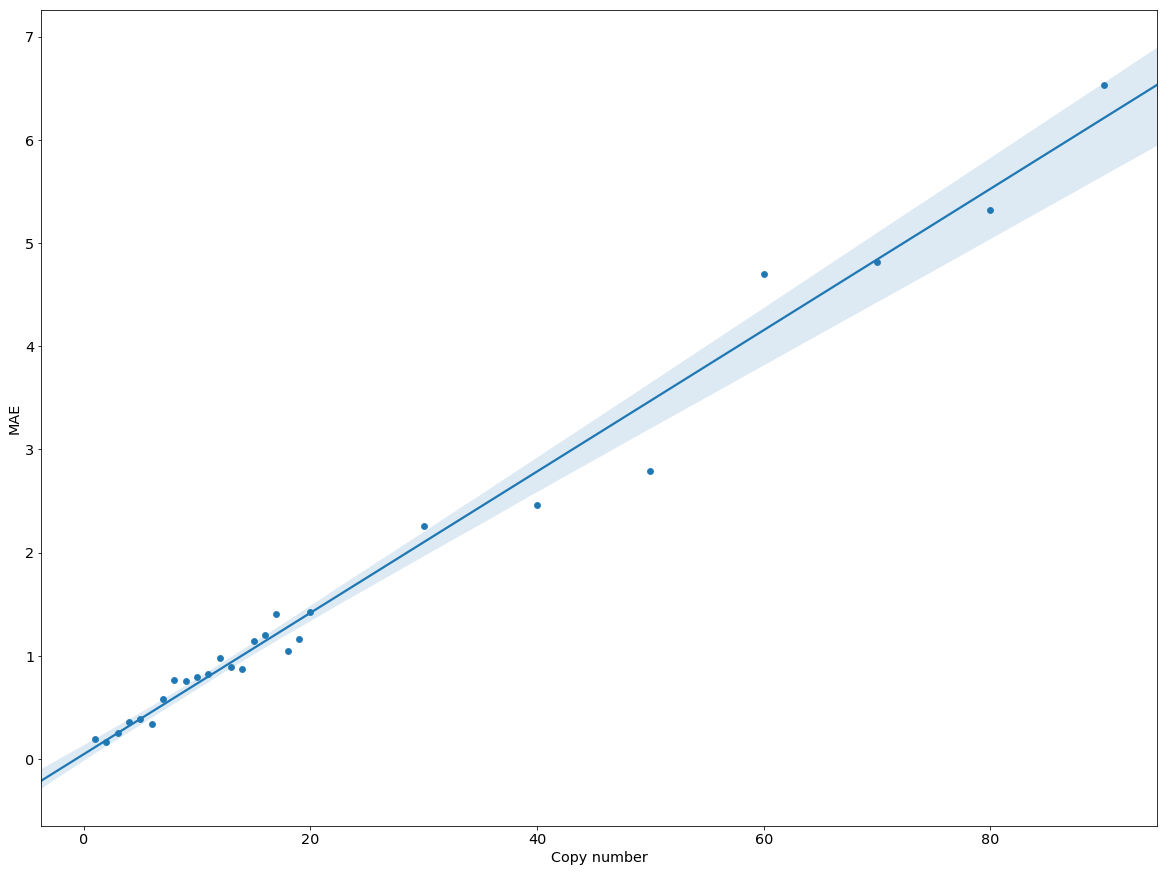

In [70]:
cn_df = pd.read_csv('/Users/ritavityaz/Downloads/cn_test_mae.txt')
cn_df
plt.rcParams['figure.figsize'] = [20, 15]

# plot = beijing_qual.plot(x='Average Phred Score')

cn_df.plot.scatter(x="copy number", y='MAE');

plt.xlabel('Copy number')
plt.savefig('/Users/ritavityaz/simulated-copynumber-scatter.png')


import seaborn as sns

sns.regplot(cn_df["copy number"],cn_df['MAE'])


plt.xlabel('Copy number')
plt.savefig('/Users/ritavityaz/simulated-copynumber-scatter.png')

In [77]:
import statsmodels.formula.api as sm
cn_df.rename(columns={'copy number':'copy_number'}, inplace=True)
result_cn = sm.ols(formula="MAE ~ copy_number", data=cn_df).fit()
print(result_cn.summary())

Intercept      0.047837
copy_number    0.068466
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    MAE   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1491.
Date:                Wed, 09 May 2018   Prob (F-statistic):           8.28e-24
Time:                        13:48:36   Log-Likelihood:                 2.9447
No. Observations:                  27   AIC:                            -1.889
Df Residuals:                      25   BIC:                            0.7022
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------